# Homework 4

## ASTR 5900, Fall 2017, University of Oklahoma

Remember to save this notebook as `hw4-<FirstnameLastname>.ipynb`

# Problem 1

The first problem of HW4 will involve fitting 2 models to some data, evaluating and comparing the $\chi^2$, then (optionally) constructing $\chi^2$ contour plots for certain of pairs of fit parameters.

## Part A

Load the data from `emission-line.dat` from the class GitHub repository.  Use `scipy.curve_fit` to fit a single gaussian plus a constant to the data (4 parameters total).  Print the fit parameters.  Plot the resulting Gaussian plus background over the data.

You better take a look at the `curve_fit` documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Compute $\chi^2$ for this fit.  You may assume the error for each point is $0.05$.

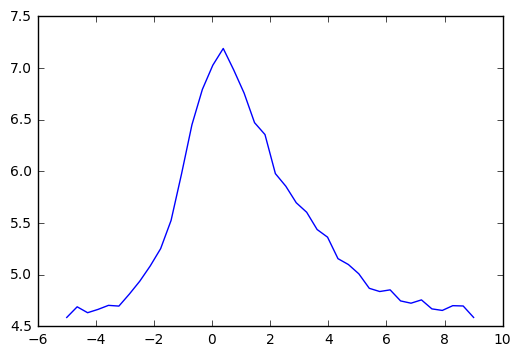

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('emission-line.dat',skiprows=1,delimiter=',')
x = data[:,0]
y = data[:,1]

plt.plot(x,y)
plt.show()

In [2]:
const=1./(np.sqrt(2.*np.pi))
def Gauss(x,sigma,mu):
    return const*(1./(np.sqrt(sigma)))*np.exp(-((x-mu)**2.)/(2*sigma))
def One_Gauss(x,A,mu,sigma,C):
    return C + A*Gauss(x,sigma,mu)
popt,pcov = curve_fit(One_Gauss,x,y)
print popt



[ 9.30134759  0.70690529  2.71987086  4.72489649]


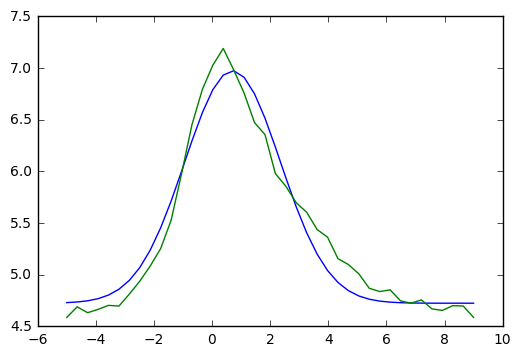

In [3]:
plt.plot(x,One_Gauss(x,*popt))
plt.plot(x,y)
plt.show()

In [4]:
chi2=(((y-One_Gauss(x,*popt))/0.05)**2).sum()
chi2_reduced = chi2/len(y)
print 'chi squared is', chi2
print 'reduced chi squared is' , chi2_reduced

chi squared is 416.952864712
reduced chi squared is 10.4238216178


## Part B

Now fit *two* gaussians to the data, print all of the fit parameters, and plot the new fit over the data.

Compute the new $\chi^2$.  How does this compare to the previous?  Briefly discuss.

In [5]:
def two_Gauss(x,A1,A2,sigma1,sigma2,mu1,mu2,C):
    return C + A1 *Gauss(x,sigma1,mu1) + A2*Gauss(x,sigma2,mu2)


In [6]:
popt_twoGauss,pcovtwoGauss = curve_fit(two_Gauss,x,y)
print popt_twoGauss

[ 6.5193836   3.9445633   4.67895151  1.07010024  1.67503561  0.13166128
  4.6442943 ]


/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


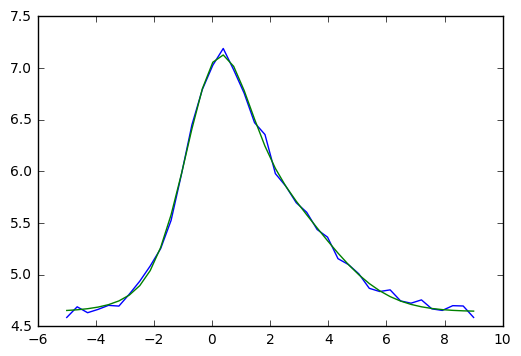

In [7]:
plt.plot(x,y)
plt.plot(x,two_Gauss(x,*popt_twoGauss))
plt.show()

In [8]:
chi2_twoGauss = (((y-two_Gauss(x,*popt_twoGauss))/0.05)**2).sum()
chi2_twoGauss_reduced = chi2_twoGauss / len(y)
print 'chi squared is', chi2_twoGauss
print 'reduced chi squared is',chi2_twoGauss_reduced

chi squared is 26.2995167228
reduced chi squared is 0.65748791807


### Part C (Extra Credit)

Using the covariance matrix returned by `scipy.curve_fit`, construct a $\chi^2$ contour plot that yields 95% confidence for two parameters of interest: first for the amplitudes of the two Gaussians, then for the widths of the Gaussians.

### Amplitudes

### Widths

# Problem 2

You are to perform bootstrap analysis on photon arrival time data from an unknown source in the sky, very loosely based on this paper: http://adsabs.harvard.edu/abs/1984MNRAS.210P..19B

### Part A

Load the arrival time data in `arrival-times.dat` from the class GitHub repository.  Write a function that takes an array-like structure of arrival times as an argument and returns the binned number of arrival time pairs for a given time difference (in other words, return bin values with their respective bin positions).  This function $N(t)$ will be our effective correlation function.

We want to fit a power-law to this correlation function.  Find the slope of best-fit if the the correlation function was on a log-log plot.  Construct the corresponding log-log plot with the line fit.


In [9]:
import numpy as np

xdata = np.loadtxt('arrival-times.dat',skiprows=1)

print xdata

def separations(arrivals):
    
    seps=[]
    
    for time1 in arrivals:
        
        for time2 in arrivals:
            
            if time2 > time1:
                seps.append(time2-time1)
                
    return np.histogram(seps) #1 more bin than val

[   0.91    0.96    1.19 ...,  499.17  499.29  499.63]


In [10]:
n,t = separations(xdata)

new_t = t[:-1]

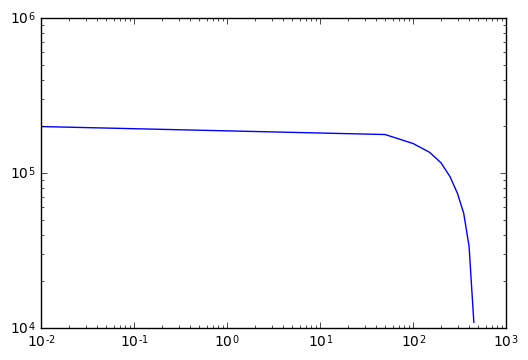

In [11]:
import matplotlib.pyplot as plt

plt.loglog(new_t,n)
plt.show()

slope of line of best fit is -0.140426771429


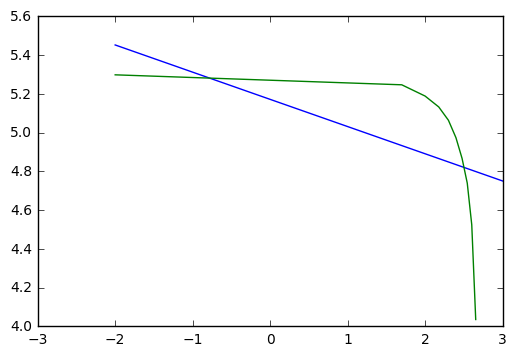

In [12]:
logt, logn = np.log10(new_t),np.log10(n)

from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x + b

popt, pcov = curve_fit(line,logt,logn)

print 'slope of line of best fit is', popt[0]

x=np.linspace(-2,3,3)
plt.plot(x,line(x,*popt)) # * unpacks popt values
plt.plot(logt,logn)
plt.show()


### Part B - Bootstrap

We want to find the dispersion of this power law.

Generate $200$ bootstrap samples of the arrival times you loaded at the beginning of the assignment.  For each bootstrap sample, fit a line and record the slope.  Evaluate the dispersion of the slope, and plot a histogram of your bootstrapped slopes.  Is the dispersion result valid? Why or why not?  Briefly discuss.

Note the bootstrap process may take several minutes.

In [79]:
N = 200

def bootstrap(data):
    slopes = np.zeros(N)
    for i in range(N):
        
        fake_data = np.random.choice(data,(len(xdata),1)) 
        
        n,t = separations(fake_data)
        
        new_t=t[:-1]
        
        logt,logn = np.log10(new_t),np.log10(n)
        
        popt, pcov = curve_fit(line,logt,logn)
        
        slopes[i] = popt[0]
        
    return slopes

In [80]:
slopes2=bootstrap(xdata)

In [42]:
#np.savetxt('slope-dispersion.txt',slopes)
#np.savetxt('slope-dispersion2.txt',slopes2)

In [13]:
#slopes=np.loadtxt('slope-dispersion.txt')
#slopes2=np.loadtxt('slope-dispersion2.txt')

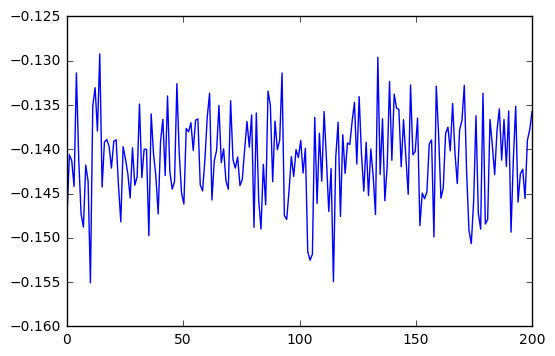

In [14]:
x=np.linspace(0,200,200)
plt.plot(x,slopes2)
plt.show()

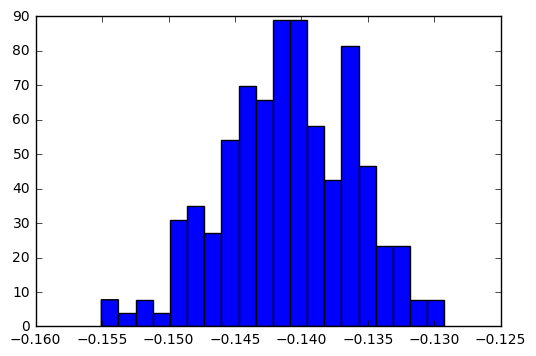

In [15]:
count, bins, ignored = plt.hist(slopes2,bins=20,normed=True)
plt.show()

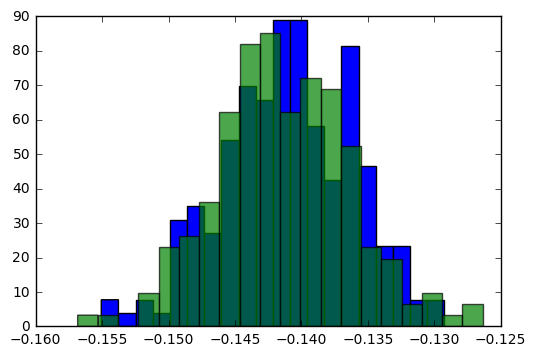

In [17]:
sigma = np.std(slopes2)
mu = np.mean(slopes2)
s = np.random.normal(mu,sigma,200)
counts1, bins1, ignored1 = plt.hist(slopes2,20,normed=True)
counts, bins, ignored = plt.hist(s,20,normed=True, alpha=0.7)
plt.show()

The boot-strap distribution (in blue) is skewed to the right of a Gaussian distribution calculated from the mean and standard deviation of the bootstrapped slopes. Because the bootstrapped dispersion does not match a Gaussian distribution, the bootstrap method is not valid in this case.